In [1]:
import pandas as pd

In [3]:
df =pd.read_csv("PowerPlant.csv")

In [7]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


At= Atmospeheric temp
V =Vaccum pressure in boiler
AP = Atmospheric Pressure
RH = relative humidity in%
PE = Power Output in Mega Watt

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(41)

In [11]:
#Dropping the duplicates

df = df.drop_duplicates(keep = "first").reset_index(drop = True)

In [12]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [14]:
## Separate X and Y

x = df.drop(columns = ["PE"])
y = df[["PE"]]

In [15]:
x.head() 

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [16]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

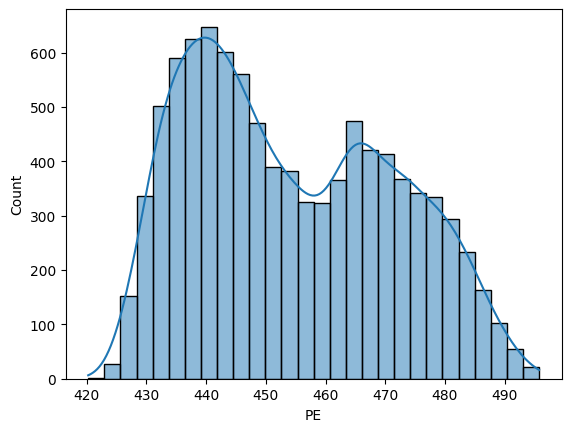

In [17]:
import seaborn as sns
sns.histplot(data=df, x = "PE", kde = True)

In [18]:
#### Apply preprocessing

x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [21]:
x_pre = num_pipe.fit_transform(x)

In [22]:
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [24]:
####Apply train test split

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2)

In [25]:
xtrain.head()

,AT,V,AP,RH
9187,1.597497,1.218431,-0.524743,-1.025208
1111,-1.347154,-1.105456,-0.551678,0.526815
4045,1.812435,1.120683,-0.056746,-1.466785
1817,0.759238,0.890501,-0.349665,0.436445
239,-1.614483,-0.947009,-0.804194,0.749999


In [26]:
ytrain.head()

,PE
9187,435.01
1111,477.38
4045,428.89
1817,440.96
239,484.78


In [27]:
### Model building and tuning

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(
    max_depth= 1, 
    min_samples_split=5,
    min_samples_leaf=5, 
    criterion= "absolute_error"
)
model1.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [29]:
model1.score(xtrain, ytrain)

0.7163732477267053

In [30]:
###Hyperparametrer Tuning

params = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split" : [5, 6, 7, 8, 9, 10],
    "min_samples_leaf" : [5, 6, 7, 8, 9, 10],
    "criterion" : ["ssquared_error", "absolute_error"]
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
rscv = RandomizedSearchCV(dtr, param_distributions= params, cv =5, scoring = "r2", n_jobs = -1)
rscv.fit(xtrain, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ml codes\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ml codes\.venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\ml codes\.venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\ml codes\.venv\lib\site-packages\sklearn\utils\_param_validation.py",

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['ssquared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10]},
                   scoring='r2')

In [35]:
rscv.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [36]:
best = rscv.best_estimator_

In [37]:
best

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=8, min_samples_split=9)

In [52]:
best.score(xtrain, ytrain)


0.9598391403104097

In [53]:
#### Evaluate the model

from sklearn.metrics import r2_score


In [59]:
y_pred = best.predict(xtest)


In [60]:
y_pred

array([467.865, 454.6  , 483.59 , ..., 434.945, 450.24 , 442.465])

In [63]:
r2_score(ytest, y_pred)

0.9373502004996214

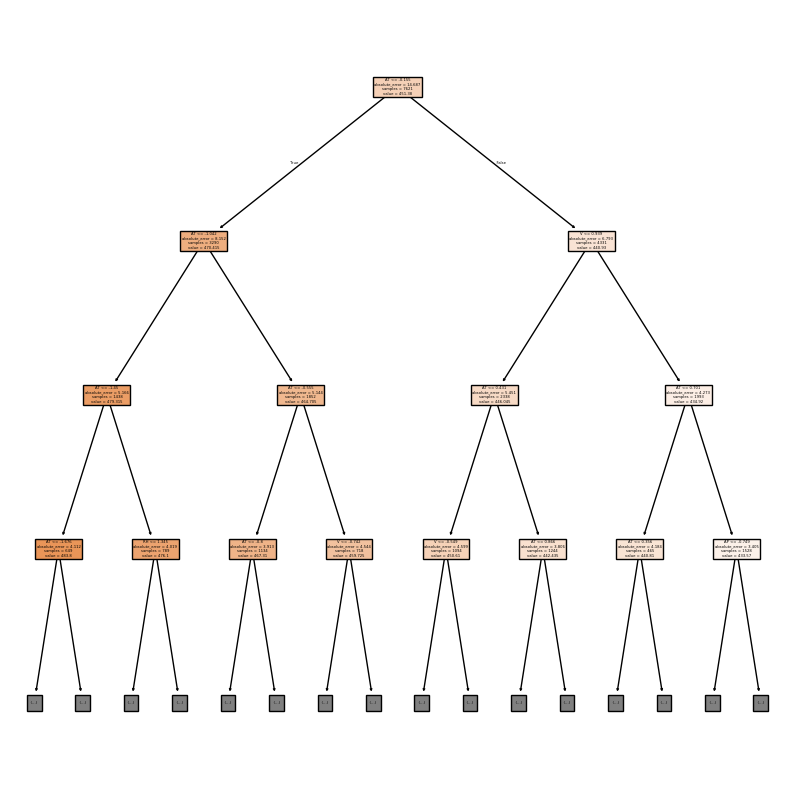

In [65]:
###Plotting the tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best, feature_names=xtrain.columns, filled=True, max_depth=3)
plt.show()

In [66]:
### Out of sample prediction

x_new = pd.read_csv("PowerPlantTest.csv")
x_new

,AT,V,AP,RH
0,25,51.0,1012,91
1,31,60.0,1005,50
2,20,47.0,1003,83
3,38,67.0,1008,70
4,23,NaN,1013,54


In [67]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [68]:
xnew_pre = num_pipe.transform(x_new)

In [69]:
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.259618,-0.208256,1.209376
1,1.523612,0.449845,-1.386664,-1.597546
2,0.045913,-0.574935,-1.723353,0.661684
3,2.463966,1.001650,-0.881632,-0.228316
4,0.448922,-0.174482,-0.039912,-1.323700


In [72]:
preds = best.predict(xnew_pre)

In [73]:
x_new["PE_pred"] = preds

In [74]:
x_new

,AT,V,AP,RH,PE_pred
0,25,51.0,1012,91,446.18
1,31,60.0,1005,50,435.04
2,20,47.0,1003,83,452.74
3,38,67.0,1008,70,430.18
4,23,NaN,1013,54,451.83


In [75]:
x_new.to_csv("Results.csv", index = False)